# finding nonlinear functions

In [1]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib import make_line
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
df = pd.read_csv('../data/seasonal.csv')
df.head()

,Time,Sales
0,0.000000,8.639429
1,0.024048,10.550833
2,0.048096,10.103700
3,0.072144,10.448219
4,0.096192,9.313215


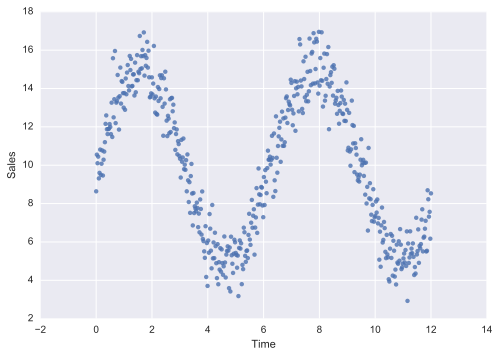

In [3]:
sns.regplot(df['Time'], df['Sales'], fit_reg=False)

In [4]:
# eh doesn't look so _linear_ but let's try anyways
X = df[['Time']]
y = df['Sales']

model = LinearRegression()
model.fit(X, y)
m = model.coef_[0]
b = model.intercept_

print('m', m)
print('b', b)

m -0.383260834129
b 12.3686704871


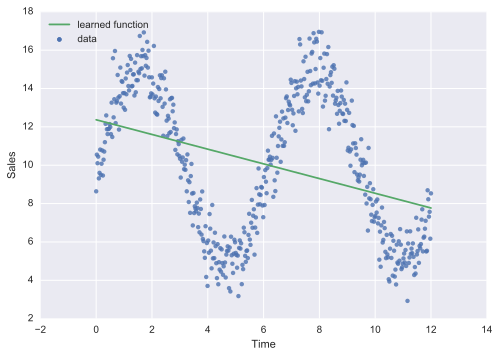

In [5]:
# what does this line look like?
sns.regplot(df['Time'], df['Sales'], fit_reg=False)
xs, ys = make_line(m, b, to=12)
plt.plot(xs, ys)
plt.legend(['learned function', 'data'], loc=2)

In [6]:
y_pred = model.predict(X)
metrics.mean_squared_error(y_pred, y)

12.246079128047125

In [7]:
# normalize to compare to error of previous example
metrics.mean_squared_error(y_pred, y)/np.mean(y)

1.2162032813735997

# what's a neural network?

![](assets/nn.png)
###### (from [neuralnetworksanddeeplearning.com](http://neuralnetworksanddeeplearning.com/))

In [8]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation

model = Sequential()
model.add(Dense(32, input_shape=(1,)))
model.add(Activation('sigmoid'))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='sgd')
model.fit(X.values, y.values, batch_size=16, nb_epoch=2000, verbose=0)

Using Theano backend.


In [ ]:
y = m_1 x_1 + m_2 x_2 + m_3 x_3 + b

0.10203661199237973

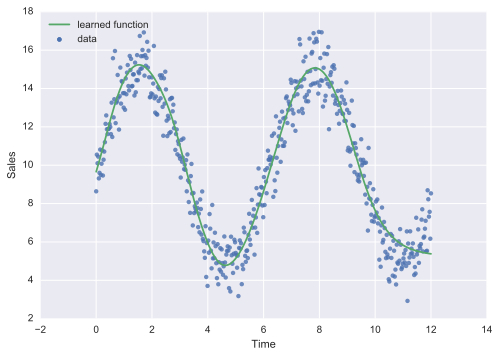

In [9]:
# what does this line look like?

sns.regplot(df['Time'], df['Sales'], fit_reg=False)
xs = np.linspace(0, 12, 500)
y_pred = model.predict(xs)
plt.plot(xs, y_pred)
plt.legend(['learned function', 'data'], loc=2)
metrics.mean_squared_error(y_pred, y)/np.mean(y)